In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
nltk.download('vader_lexicon')
import tqdm



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\loris.deluca\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv("data/Reviews.csv")

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.shape

(568454, 10)

Important point to check is how the data is distributed. 

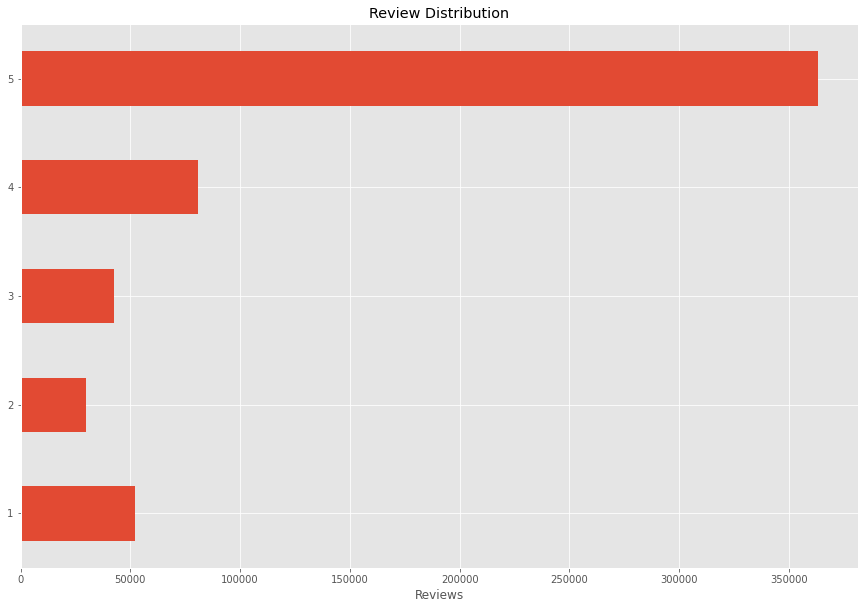

In [5]:
ax = df['Score'].value_counts()\
    .sort_index().plot(kind='barh',
    title='Review Distribution',
    figsize=(15,10))
ax.set_xlabel('Reviews')
plt.show()

Looks like the reviews are more prone towards positive ones. 

# VADER

### BOW Approach

In [6]:
sid = SIA()

In [17]:
df_vader = df.head(500)

In [18]:
def sentiment_vader(df_vader):
  result =  pd.DataFrame.from_dict(sid.polarity_scores(df_vader['Text']), orient='index').T
  return result
  

In [19]:
pd.DataFrame.from_dict(sid.polarity_scores(df['Text'][0]), orient='index').T

,neg,neu,pos,compound
0,0.0,0.695,0.305,0.9441


In [27]:
df["results"] = df_vader.apply(sentiment_vader, axis=1)

: 

: 

In [26]:
df.tail(1).values


array([[568454, 'B001LR2CU2', 'A3LGQPJCZVL9UC', 'srfell17', 0, 0, 5,
        1338422400, 'Great Honey',
        'I am very satisfied ,product is as advertised, I use it on cereal, with raw vinegar, and as a general sweetner.',
        nan]], dtype=object)